In [2]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


# **INDRAYANI RIVER DATASET**


1. **Imported Libraries:**
   - Imported the pandas library as 'pd'.
   - Imported the StandardScaler from scikit-learn for data preprocessing.

2. **Read CSV File:**
   - Used pandas to read a CSV file ('df.csv') into a DataFrame named 'df'.

3. **Displayed Initial DataFrame:**
   - Printed the first few rows of the initial DataFrame using `df.head()`.

4. **Data Preprocessing:**
   a. **Handled Missing Values:**
      - Replaced missing values with the mean of each column in the DataFrame.

   b. **Time Feature Engineering:**
      - Converted the 'Time' column to a datetime format.
      - Created new columns 'Hour' and 'Minute' by extracting corresponding values from the 'Time' column.
   
   c. **Dropped Original 'Time' Column:**
      - Removed the original 'Time' column from the DataFrame.

5. **Displayed Preprocessed DataFrame:**
   - Printed the preprocessed DataFrame after handling missing values and performing time feature engineering.

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('df.csv')


print("Initial DataFrame:")
print(df.head)


df = df.fillna(df.mean())


df["Time"] = pd.to_datetime(df["Time"])
df["Hour"] = df["Time"].dt.hour
df["Minute"] = df["Time"].dt.minute


df = df.drop(["Time"], axis=1)


print("\nPreprocessed DataFrame:")
print(df)


Initial DataFrame:
<bound method NDFrame.head of    Sampling Season  SampleNo   Time  Air temp(°)  Water temp(*C)   Ph  \
0     Rainy Season         1  09:05           23              24  8.0   
1     Rainy Season         2  09:49           25              24  7.5   
2     Rainy Season         3  10:39           26              24  8.0   
3     Rainy Season         4  11:18           26              24  8.0   
4    Winter Season         1  08:26           14              18  7.0   
5    Winter Season         2  08:52           13              18  7.0   
6    Winter Season         3  09:10           15              19  7.0   
7    Winter Season         4  10:03           15              19  7.0   
8    Summer Season         1  08:14           25              26  7.0   
9    Summer Season         2  08:39           26              22  6.0   
10   Summer Season         3  09:05           28              22  7.0   
11   Summer Season         4  09:54           30              24  7.0   

 

<ipython-input-3-9b939e9f125f>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())



1. **Filtered Non-Numeric Columns:**
   - Filtered out non-numeric columns from the DataFrame using `select_dtypes(include='number')`.

2. **Calculated Correlation Matrix:**
   - Calculated the correlation matrix for the numeric columns in the DataFrame.
3. **Created Correlation Heatmap:**
   - Created a heatmap using seaborn with annotations, using the calculated correlation matrix.
   - Set the figure size to (12, 10) for better visualization.
   - Used a coolwarm color map and specified formatting for annotations.
   - Set the title of the heatmap as 'Correlation Matrix Heatmap for Numeric Columns'.

4. **Displayed Heatmap:**
   - Showed the generated heatmap using `plt.show()`.

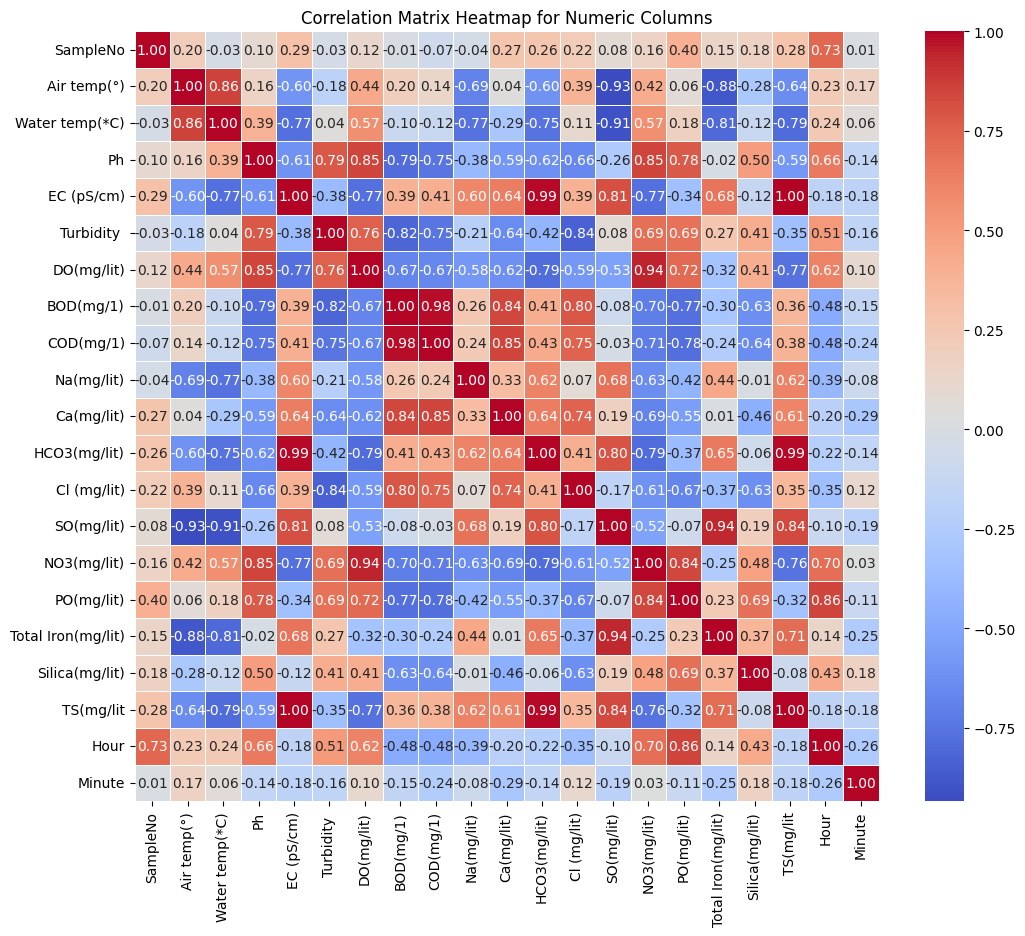

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed DataFrame
# If you've made further changes, make sure to use the correct DataFrame

# Filter out non-numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Numeric Columns')
plt.show()



1. **Z-score Analysis:**
   - Calculates Z-scores for numerical columns in the DataFrame.
   - Creates a DataFrame with Z-scores.

2. **Outlier Identification:**
   - Sets a threshold to identify outliers based on Z-scores (e.g., threshold = 3).
   - Identifies and prints outliers in the original DataFrame.

3. **Visualization:**
   - Visualizes outliers using a boxplot for numerical variables.

4. **Prints Z-score DataFrame:**
   - Prints the DataFrame containing Z-scores for examination.

          Ph  DO(mg/lit)    Na(mg/lit)  Ca(mg/lit)  HCO3(mg/lit)  Cl (mg/lit)  \
0   1.420127    1.056329 -1.625798e-16   -1.031385     -1.169703    -1.018608   
1   0.523205    1.056329 -1.040049e+00   -1.175256     -1.169703    -1.011450   
2   1.420127    2.175865 -1.040049e+00   -0.908067     -1.115661    -0.994749   
3   1.420127    1.056329 -1.223097e+00   -1.093044     -1.124645    -0.970889   
4  -0.373718   -0.902859  5.824274e-02   -0.024287      0.579895    -0.374398   
5  -0.373718   -0.790906  1.980253e+00   -0.168158      0.897389    -0.374398   
6  -0.373718   -0.622975  1.888729e+00   -0.020587      0.552874    -0.422117   
7  -0.373718   -0.760118  2.412913e-01    1.023918      2.228164     0.102795   
8  -0.373718   -0.678952 -7.654760e-01    0.016819     -0.386099     0.794725   
9  -2.167562   -0.902859 -2.163302e-01    0.304562      0.147562     0.937883   
10 -0.373718   -0.343091  3.328156e-01    2.442077      0.194848     1.176480   
11 -0.373718   -0.343091 -2.

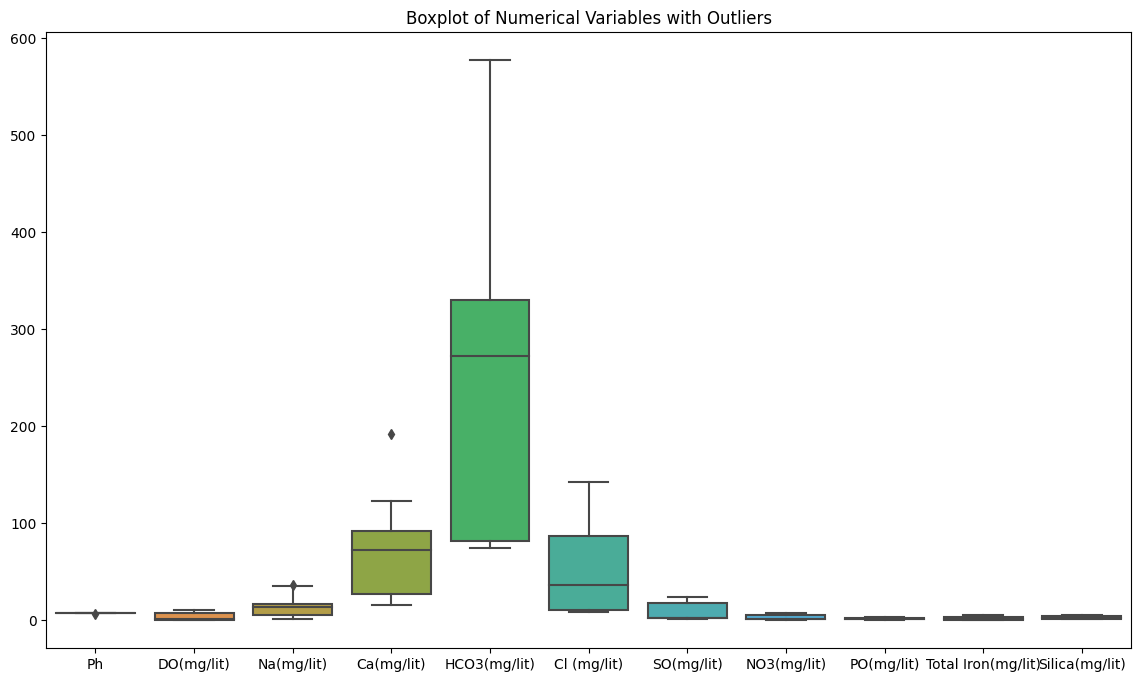

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


# Select numerical columns for Z-score analysis
numerical_columns = df.select_dtypes(include=['float64']).columns

# Calculate Z-scores for numerical columns
z_scores = zscore(df[numerical_columns])

# Create a DataFrame with Z-scores
z_score_df = pd.DataFrame(z_scores, columns=numerical_columns)

print(z_score_df)
# Set a threshold for Z-score to identify outliers (e.g., threshold = 3)
threshold = 3
outliers = (z_score_df > threshold) | (z_score_df < -threshold)

# Identify outliers in the original DataFrame
outliers_df = df[outliers.any(axis=1)]

# Print or visualize the outliers
print("Outliers:")
print(outliers_df)

# Visualize outliers using a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Variables with Outliers")
plt.show()


 classifies water quality in a DataFrame based on specified criteria, trains and evaluates Logistic Regression and Random Forest models for prediction, and prints relevant metrics.



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your preprocessed DataFrame

def classify_water_quality(row):
    # Your classification logic goes here based on the given parameters
 if (
        7 <= row['Ph'] <= 7.5 and
        10 <= row['COD(mg/1)'] <= 20 and
        2 <= row['BOD(mg/1)'] <= 5 and
        0 <= row['EC (pS/cm)'] <= 5000 and
        row['Turbidity '] <= 1 and  # Note the corrected column name with a space
        5 <= row['DO(mg/lit)'] <= 10 and
        row['Total Iron(mg/lit)'] <= 10
 ):
        return 'Average'
 else:
        return 'Bad'

# Create a 'WaterQuality' column based on your classification criteria
df['WaterQuality'] = df.apply(classify_water_quality, axis=1)

# Assuming 'WaterQuality' is the target variable
features = ['Ph', 'COD(mg/1)', 'BOD(mg/1)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)', 'Total Iron(mg/lit)']
X = df[features]
y = df['WaterQuality']

# Handling missing values
X.fillna(X.mean(), inplace=True)  # You can choose another method if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

# Model 2: Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

# Evaluate models using classification metrics
accuracy_lr = accuracy_score(y_test, predictions_lr)
accuracy_rf = accuracy_score(y_test, predictions_rf)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_lr))

print("\nRandom Forest Classifier Model:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))

# Print the final DataFrame with season, time, other elements, and water quality
print(df[['Sampling Season', 'Time', 'Ph', 'COD(mg/1)', 'BOD(mg/1)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)', 'Total Iron(mg/lit)', 'WaterQuality']])


<ipython-input-5-5e43fc849806>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # You can choose another method if needed


ValueError: ignored

# **CLASSIFYING PH LEVEL**

1. **pH Level Classification Function:**
   - Defines a function `classify_ph_level` to classify pH levels as 'Neutral', 'Acidic', or 'Alkaline'.

2. **Applying Classification Logic:**
   - Applies the pH level classification logic to create a new column 'PhLevel' in the DataFrame.

3. **Feature Selection and Target Variable:**
   - Selects features ('COD(mg/1)', 'BOD(mg/1)', etc.) and the target variable ('PhLevel').

4. **Handling Missing Values:**
   - Fills missing values in the feature matrix using the mean.

5. **Train-Test Split:**
   - Splits the data into training and testing sets.

6. **User-Selected Model:**
   - Prompts the user to choose between Logistic Regression (L) and Random Forest (R) models.

7. **Model Training and Evaluation:**
   - Initializes and fits the selected model based on user input.
   - Evaluates the model using accuracy, classification report, and confusion matrix on the testing set.

8. **Prints Results:**
   - Prints the selected model's name, accuracy, classification report, and confusion matrix.

9. **Displays Final DataFrame:**
   - Prints the final DataFrame with selected columns including 'Sampling Season', 'Ph', and 'PhLevel'.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your preprocessed DataFrame

# Function to classify pH levels
def classify_ph_level(ph_value):
    if 6.5 <= ph_value <= 7.5:
        return 'Neutral'
    elif ph_value < 6.5:
        return 'Acidic'
    else:
        return 'Alkaline'

# Create a 'PhLevel' column based on the classification of pH
df['PhLevel'] = df['Ph'].apply(classify_ph_level)

# Assuming 'PhLevel' is the target variable
features = ['COD(mg/1)', 'BOD(mg/1)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)', 'Total Iron(mg/lit)']
X = df[features]
y = df['PhLevel']

# Handling missing values
X.fillna(X.mean(), inplace=True)  # You can choose another method if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ask the user which model to use
model_choice = input("Choose a model (L for Logistic Regression, R for Random Forest): ")

# Initialize the selected model based on user input
if model_choice == 'L':
    model = LogisticRegression()
elif model_choice == 'R':
    model = RandomForestClassifier()
else:
    print("Invalid model choice. Please choose L or R.")
    exit()

# Fit the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, predictions)
print(f"Model: {model.__class__.__name__}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Print the final DataFrame with season, time, other elements, pH, and pH level
print(df[['Sampling Season', 'Ph', 'PhLevel']])


<ipython-input-10-2e43967cca38>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)  # You can choose another method if needed


Choose a model (L for Logistic Regression, R for Random Forest): R
Model: RandomForestClassifier
Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

      Acidic       0.00      0.00      0.00         1
    Alkaline       1.00      1.00      1.00         1
     Neutral       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3

Confusion Matrix:
[[0 0 1]
 [0 1 0]
 [0 0 1]]
   Sampling Season   Ph   PhLevel
0     Rainy Season  8.0  Alkaline
1     Rainy Season  7.5   Neutral
2     Rainy Season  8.0  Alkaline
3     Rainy Season  8.0  Alkaline
4    Winter Season  7.0   Neutral
5    Winter Season  7.0   Neutral
6    Winter Season  7.0   Neutral
7    Winter Season  7.0   Neutral
8    Summer Season  7.0   Neutral
9    Summer Season  6.0    Acidic
10   Summer Season  7.0   Neutral
11   Summer Season  7.0   Neut

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Identify Most Polluted Season**

1. **Feature Engineering:**
   - Creates a new column 'Total_Pollution' by summing 'COD(mg/1)' and 'BOD(mg/1)'.

2. **Define Features and Target Variable:**
   - Specifies the features and the target variable for regression.

3. **Handling Missing Values:**
   - Fills missing values in the feature matrix with the mean.

4. **Train-Test Split:**
   - Splits the data into training and testing sets.

5. **Model Training:**
   - Utilizes a Random Forest Regressor (`model_rf`) to predict 'Total_Pollution'.

6. **Model Evaluation:**
   - Computes Mean Squared Error (MSE) to assess the performance of the regression model.

7. **Seasonal Predictions:**
   - Predicts the total pollution for each unique season based on the trained model.

8. **Identify Most Polluted Season:**
   - Determines the season with the highest predicted pollution.

9. **Display Most Polluted Season's Data:**
   - Prints all values for the identified most polluted season.


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your preprocessed DataFrame

# Create a new column for the sum of COD and BOD
df['Total_Pollution'] = df['COD(mg/1)'] + df['BOD(mg/1)']

# Define features and target variable
features = ['SampleNo', 'Air temp(°)', 'Water temp(*C)', 'Ph', 'EC (pS/cm)',
            'Turbidity ', 'DO(mg/lit)', 'BOD(mg/1)', 'COD(mg/1)', 'Na(mg/lit)', 'Ca(mg/lit)',
            'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)', 'NO3(mg/lit)', 'PO(mg/lit)',
            'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
target = 'Total_Pollution'

# Handling missing values
X = df[features].fillna(df[features].mean())
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Predict total pollution for each season
seasons = df['Sampling Season'].unique()
season_pollution_predictions = {}

for season in seasons:
    season_data = df[df['Sampling Season'] == season]
    season_X = season_data[features].fillna(season_data[features].mean())
    season_pollution_predictions[season] = model_rf.predict(season_X).mean()

# Find the season with the highest predicted pollution
most_polluted_season = max(season_pollution_predictions, key=season_pollution_predictions.get)
print(f"The most polluted season (predicted) is: {most_polluted_season}")

# Print all values for the most polluted season
most_polluted_season_data = df[df['Sampling Season'] == most_polluted_season]
print(f"\nAll values for {most_polluted_season} season:")
print(most_polluted_season_data)


Mean Squared Error: 795.3608333333332
The most polluted season (predicted) is: Summer Season

All values for Summer Season season:
   Sampling Season  SampleNo  Air temp(°)  Water temp(*C)   Ph  EC (pS/cm)  \
8    Summer Season         1           25              26  7.0         352   
9    Summer Season         2           26              22  6.0         551   
10   Summer Season         3           28              22  7.0         565   
11   Summer Season         4           30              24  7.0         624   

    Turbidity   DO(mg/lit)  BOD(mg/1)  COD(mg/1)  ...  SO(mg/lit)  \
8           17         0.8         26         40  ...        0.89   
9           14         0.0         34         44  ...        2.00   
10          16         2.0         39         52  ...        2.00   
11          15         2.0         21         28  ...        2.00   

    NO3(mg/lit)  PO(mg/lit)  Total Iron(mg/lit)  Silica(mg/lit)  TS(mg/lit  \
8          0.93      0.3600               0.290       

# **LEAST POLLUTED SEASON**

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your preprocessed DataFrame

# Create a new column for the sum of COD and BOD
df['Total_Pollution'] = df['COD(mg/1)'] + df['BOD(mg/1)']

# Define features and target variable
features = ['SampleNo', 'Air temp(°)', 'Water temp(*C)', 'Ph', 'EC (pS/cm)',
            'Turbidity ', 'DO(mg/lit)', 'BOD(mg/1)', 'COD(mg/1)', 'Na(mg/lit)', 'Ca(mg/lit)',
            'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)', 'NO3(mg/lit)', 'PO(mg/lit)',
            'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
target = 'Total_Pollution'

# Handling missing values
X = df[features].fillna(df[features].mean())
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Predict total pollution for each season
seasons = df['Sampling Season'].unique()
season_pollution_predictions = {}

for season in seasons:
    season_data = df[df['Sampling Season'] == season]
    season_X = season_data[features].fillna(season_data[features].mean())
    season_pollution_predictions[season] = model_rf.predict(season_X).mean()

# Find the season with the least predicted pollution
least_polluted_season = min(season_pollution_predictions, key=season_pollution_predictions.get)
print(f"The least polluted season (predicted) is: {least_polluted_season}")

# Print all values for the least polluted season
least_polluted_season_data = df[df['Sampling Season'] == least_polluted_season]
print(f"\nAll values for {least_polluted_season} season:")
print(least_polluted_season_data)


Mean Squared Error: 810.0006333333332
The least polluted season (predicted) is: Rainy Season

All values for Rainy Season season:
  Sampling Season  SampleNo  Air temp(°)  Water temp(*C)   Ph  EC (pS/cm)  \
0    Rainy Season         1           23              24  8.0         197   
1    Rainy Season         2           25              24  7.5         187   
2    Rainy Season         3           26              24  8.0         195   
3    Rainy Season         4           26              24  8.0         219   

   Turbidity   DO(mg/lit)  BOD(mg/1)  COD(mg/1)  ...  SO(mg/lit)  NO3(mg/lit)  \
0          37         7.0          7         16  ...         2.0          6.0   
1          30         7.0          6         12  ...         1.6          5.0   
2          44        11.0          7         18  ...         2.0          7.0   
3          30         7.0          7         14  ...         2.0          8.0   

   PO(mg/lit)  Total Iron(mg/lit)  Silica(mg/lit)  TS(mg/lit  Hour  Minute  \


# **FACTORS AFFECTING PH OF RIVER WATER :**

1. **Define Features and Target Variable for 'Ph':**
   - Specifies the features ('Air temp(°)', 'Water temp(*C)', etc.) and the target variable ('Ph').

2. **Handling Missing Values:**
   - Fills missing values in the feature matrix with the mean.

3. **Train-Test Split:**
   - Splits the data into training and testing sets.

4. **Model Training:**
   - Utilizes a Gradient Boosting Regressor (`model_gb`) to predict 'Ph'.

5. **Model Evaluation:**
   - Computes Mean Squared Error (MSE) to assess the performance of the regression model for 'Ph'.

6. **Feature Importance Analysis:**
   - Calculates feature importance for 'Ph' using the trained model.
   - Creates a DataFrame displaying features and their corresponding importance values, sorted in descending order.

7. **Prints Feature Importance:**
   - Prints the feature importance for 'Ph' in a tabular format.

8. **Identify Most Important Feature for 'Ph':**
   - Determines and prints the most important feature for predicting 'Ph'.


In [14]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df is your preprocessed DataFrame

# Define features and target variable for 'Ph'
features = ['Air temp(°)', 'Water temp(*C)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)',
            'Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
            'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
target = 'Ph'

# Handling missing values
X = df[features].fillna(df[features].mean())
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Gradient Boosting Regressor for 'Ph'
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
predictions = model_gb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error for 'Ph': {mse}")
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Mean Absolute Error for 'Ph': {mae}")
print(f"Root Mean Squared Error for 'Ph': {rmse}")

# Feature importance for 'Ph'
feature_importance = model_gb.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for 'Ph':")
print(sorted_feature_importance)

# Analyze the most important feature for 'Ph'
most_important_feature_ph = sorted_feature_importance.iloc[0]['Feature']
print(f"\nThe most important feature for 'Ph' is: {most_important_feature_ph}")


Mean Squared Error for 'Ph': 0.36237170948859476
Mean Absolute Error for 'Ph': 0.431714159292488
Root Mean Squared Error for 'Ph': 0.601973180040934

Feature Importance for 'Ph':
               Feature  Importance
6           Ca(mg/lit)    0.245540
10         NO3(mg/lit)    0.201280
5           Na(mg/lit)    0.150565
8          Cl (mg/lit)    0.111198
14           TS(mg/lit    0.096729
4           DO(mg/lit)    0.082868
2           EC (pS/cm)    0.072927
7         HCO3(mg/lit)    0.026706
0          Air temp(°)    0.008132
9           SO(mg/lit)    0.004056
1       Water temp(*C)    0.000000
3           Turbidity     0.000000
11          PO(mg/lit)    0.000000
12  Total Iron(mg/lit)    0.000000
13      Silica(mg/lit)    0.000000

The most important feature for 'Ph' is: Ca(mg/lit)


# **BY USING RANDOM FOREST REGRESSOR**

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Define features and target variable for 'Ph'
features = ['Air temp(°)', 'Water temp(*C)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)',
            'Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
            'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
target = 'Ph'

# Handling missing values
X = df[features].fillna(df[features].mean())
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor for 'Ph'
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"Mean Squared Error for 'Ph': {mse}")
print(f"Mean Absolute Error for 'Ph': {mae}")
print(f"Root Mean Squared Error for 'Ph': {rmse}")

# Feature importance for 'Ph'
feature_importance = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance for 'Ph':")
print(sorted_feature_importance)

# Analyze the most important feature for 'Ph'
most_important_feature_ph = sorted_feature_importance.iloc[0]['Feature']
print(f"\nThe most important feature for 'Ph' is: {most_important_feature_ph}")


Mean Squared Error for 'Ph': 0.3950666666666663
Mean Absolute Error for 'Ph': 0.473333333333333
Root Mean Squared Error for 'Ph': 0.6285432894134391

Feature Importance for 'Ph':
               Feature  Importance
4           DO(mg/lit)    0.167230
5           Na(mg/lit)    0.144943
10         NO3(mg/lit)    0.141458
2           EC (pS/cm)    0.137275
8          Cl (mg/lit)    0.096053
7         HCO3(mg/lit)    0.090539
14           TS(mg/lit    0.082217
6           Ca(mg/lit)    0.061576
11          PO(mg/lit)    0.023023
13      Silica(mg/lit)    0.019492
3           Turbidity     0.011217
1       Water temp(*C)    0.010888
12  Total Iron(mg/lit)    0.008514
9           SO(mg/lit)    0.003280
0          Air temp(°)    0.002296

The most important feature for 'Ph' is: DO(mg/lit)


# **Choose a pollutant for analysis**

1. **User Input for Pollutant Analysis:**
   - Prompts the user to input the pollutant they want to analyze (Turbidity, Cl, BOD).

2. **Define Features and Target Variable for Specified Pollutant:**
   - Determines the target variable and features based on the user's input.

3. **Handling Missing Values:**
   - Fills missing values in the feature matrix with the mean.

4. **Train-Test Split:**
   - Splits the data into training and testing sets.

5. **Model Training:**
   - Utilizes a Random Forest Regressor (`model_rf`) to predict the specified pollutant.

6. **Model Evaluation:**
   - Computes Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to assess the performance of the regression model for the specified pollutant.

7. **Prints Evaluation Metrics:**
   - Prints the calculated MSE, MAE, and RMSE values for the specified pollutant.

8. **Feature Importance Analysis:**
   - Calculates feature importance for the specified pollutant using the trained model.
   - Creates a DataFrame displaying features and their corresponding importance values, sorted in descending order.

9. **Prints Feature Importance:**
   - Prints the feature importance for the specified pollutant in a tabular format.

10. **Identify Most Important Feature for Specified Pollutant:**
    - Determines and prints the most important feature for predicting the specified pollutant.


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming df is your preprocessed DataFrame

# Ask user for input regarding which pollutant to analyze
pollutant = input("Enter the pollutant (Turbidity, Cl, BOD): ").capitalize()

# Define features and target variable for the specified pollutant
if pollutant == 'Turbidity':
    target = 'Turbidity '
elif pollutant == 'Cl':
    target = 'Cl (mg/lit)'
elif pollutant == 'BOD':
    target = 'BOD(mg/1)'
else:
    print("Invalid pollutant choice. Exiting.")
    exit()

features = ['Air temp(°)', 'Water temp(*C)', 'EC (pS/cm)', 'DO(mg/lit)',
            'Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'SO(mg/lit)',
            'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']

# Handling missing values
X = df[features].fillna(df[features].mean())
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor for the specified pollutant
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions = model_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"Mean Squared Error for {pollutant}: {mse}")
print(f"Mean Absolute Error for {pollutant}: {mae}")
print(f"Root Mean Squared Error for {pollutant}: {rmse}")

# Feature importance for the specified pollutant
feature_importance = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

print(f"\nFeature Importance for {pollutant}:")
print(sorted_feature_importance)

# Analyze the most important feature for the specified pollutant
most_important_feature = sorted_feature_importance.iloc[0]['Feature']
print(f"\nThe most important feature for {pollutant} is: {most_important_feature}")


Enter the pollutant (Turbidity, Cl, BOD): cl
Mean Squared Error for Cl: 84.27593400000008
Mean Absolute Error for Cl: 8.927333333333335
Root Mean Squared Error for Cl: 9.180192481642205

Feature Importance for Cl:
               Feature  Importance
5           Ca(mg/lit)    0.201381
9           PO(mg/lit)    0.191812
11      Silica(mg/lit)    0.160705
10  Total Iron(mg/lit)    0.158150
0          Air temp(°)    0.086206
7           SO(mg/lit)    0.056922
3           DO(mg/lit)    0.032047
2           EC (pS/cm)    0.031014
8          NO3(mg/lit)    0.023615
4           Na(mg/lit)    0.019332
6         HCO3(mg/lit)    0.016841
12           TS(mg/lit    0.013916
1       Water temp(*C)    0.008059

The most important feature for Cl is: Ca(mg/lit)


# **LEAST PRESENT ELEMENT**

1. **Feature and Element Selection:**
   - Selects columns corresponding to features ('Air temp(°)', 'Water temp(*C)', etc.) and elements.
   
2. **Calculate Least Present Element:**
   - Calculates the least present element for each row in the DataFrame based on the provided element columns.

3. **Create Target Variable for Classification:**
   - Creates a target variable ('Is_Least_Present') indicating whether an element is the least present or not.

4. **Define Features and Target Variable for Classification:**
   - Defines features and the target variable for the classification task.

5. **Train-Test Split:**
   - Splits the data into training and testing sets.

6. **Model Training:**
   - Utilizes a RandomForestClassifier (`model_rf`) to predict whether an element is the least present or not.

7. **Predict on the Entire Dataset:**
   - Obtains predictions for the entire dataset using the trained model.

8. **Count Occurrences of Predicted Least Present Elements:**
   - Counts the occurrences of predicted least present elements in the entire dataset.

9. **Find the Least Present Element Overall:**
   - Determines and prints the least present element overall based on the predictions.

10. **Model Evaluation:**
    - Evaluates the model's performance using accuracy, confusion matrix, and classification report.

11. **Print Model Evaluation Metrics:**
    - Prints the accuracy, confusion matrix, and classification report for the model.



In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your preprocessed DataFrame

# Select columns corresponding to features and elements
features = ['Air temp(°)', 'Water temp(*C)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)',
            'Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
            'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
element_columns = ['Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
                   'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']

# Calculate the least present element for each row
df['Least_Present_Element'] = df[element_columns].idxmin(axis=1)

# Create a target variable indicating whether an element is the least present or not
df['Is_Least_Present'] = df[element_columns].idxmin(axis=1) == df['Least_Present_Element']

# Define features and target variable for classification
X = df[features].fillna(df[features].mean())
y = df['Is_Least_Present']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict on the entire dataset
predictions_all = model_rf.predict(X)

# Count occurrences of predicted least present elements
least_present_counts = df.loc[predictions_all].groupby('Least_Present_Element').size()

# Find the least present element overall
least_present_element_overall = least_present_counts.idxmin()

print(f"\nThe least present element overall is: {least_present_element_overall}")

# Evaluate the model
accuracy = accuracy_score(y, predictions_all)
conf_matrix = confusion_matrix(y, predictions_all)
classification_rep = classification_report(y, predictions_all)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



The least present element overall is: Na(mg/lit)

Model Evaluation Metrics:
Accuracy: 1.00

Confusion Matrix:
[[12]]

Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



# **MOST PRESENT ELEMENT**

1. **Calculate Most Present Element:**
   - Calculates the most present element for each row in the DataFrame based on the provided element columns.

2. **Create Target Variable for Classification:**
   - Creates a target variable ('Is_Most_Present') indicating whether an element is the most present or not.

3. **Define Features and Target Variable for Classification:**
   - Defines features and the target variable for the classification task.

4. **Train-Test Split:**
   - Splits the data into training and testing sets.

5. **Model Training:**
   - Utilizes a RandomForestClassifier (`model_rf`) to predict whether an element is the most present or not.

6. **Predict on the Entire Dataset:**
   - Obtains predictions for the entire dataset using the trained model.

7. **Count Occurrences of Predicted Most Present Elements:**
   - Counts the occurrences of predicted most present elements in the entire dataset.

8. **Find the Most Present Element Overall:**
   - Determines and prints the most present element overall based on the model's predictions.

9. **Model Evaluation:**
   - Evaluates the model's performance using accuracy, confusion matrix, and classification report.

10. **Print Model Evaluation Metrics:**
    - Prints the accuracy, confusion matrix, and classification report for the model.


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your preprocessed DataFrame

# Select columns corresponding to features and elements
features = ['Air temp(°)', 'Water temp(*C)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)',
            'Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
            'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']
element_columns = ['Na(mg/lit)', 'Ca(mg/lit)', 'HCO3(mg/lit)', 'Cl (mg/lit)', 'SO(mg/lit)',
                   'NO3(mg/lit)', 'PO(mg/lit)', 'Total Iron(mg/lit)', 'Silica(mg/lit)', 'TS(mg/lit']

# Calculate the most present element for each row
df['Most_Present_Element'] = df[element_columns].idxmax(axis=1)

# Create a target variable indicating whether an element is the most present or not
df['Is_Most_Present'] = df[element_columns].idxmax(axis=1) == df['Most_Present_Element']

# Define features and target variable for classification
X = df[features].fillna(df[features].mean())
y = df['Is_Most_Present']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predict on the entire dataset
predictions_all = model_rf.predict(X)

# Count occurrences of predicted most present elements
most_present_counts = df.loc[predictions_all].groupby('Most_Present_Element').size()

# Find the most present element overall
most_present_element_overall = most_present_counts.idxmax()

print(f"\nThe most present element overall is: {most_present_element_overall}")

# Evaluate the model
accuracy = accuracy_score(y, predictions_all)
conf_matrix = confusion_matrix(y, predictions_all)
classification_rep = classification_report(y, predictions_all)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)



The most present element overall is: TS(mg/lit

Model Evaluation Metrics:
Accuracy: 1.00

Confusion Matrix:
[[12]]

Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12




## **Classification of water quality ('Good' or 'Bad')**

Here's a summary of the provided code:

1. **Define Features and Target Variable:**
   - Defines features ('Ph', 'COD(mg/1)', 'BOD(mg/1)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)', 'Total Iron(mg/lit)') and the target variable ('WaterQuality').

2. **Create Target Variable for Classification:**
   - Creates a target variable 'WaterQuality' based on specified conditions regarding pH, COD, and BOD.

3. **Train-Test Split:**
   - Splits the data into training and testing sets.

4. **Model Training:**
   - Utilizes a K-Nearest Neighbors Classifier (`model_knn`) to predict water quality ('Good' or 'Bad').

5. **Predict on the Entire Dataset:**
   - Obtains predictions for the entire dataset using the trained K-Nearest Neighbors model.

6. **Reset Index:**
   - Resets the index of the original dataset and the target variable for accurate comparison.

7. **Print Actual and Predicted Water Quality:**
   - Iterates through each row in the dataset, printing the actual and predicted water quality.

8. **Evaluate the KNN Model:**
   - Calculates accuracy, confusion matrix, and classification report for the K-Nearest Neighbors model on the entire dataset.

9. **Print Model Evaluation Metrics:**
   - Prints accuracy, confusion matrix, and classification report for the K-Nearest Neighbors model.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your preprocessed DataFrame

# Corrected column names
features = ['Ph', 'COD(mg/1)', 'BOD(mg/1)', 'EC (pS/cm)', 'Turbidity ', 'DO(mg/lit)', 'Total Iron(mg/lit)']

# Create a target variable indicating whether water quality is 'Good' or 'Bad'
df['WaterQuality'] = df.apply(lambda row: 'Good' if row['Ph'] > 7.0 and 5 <= row['COD(mg/1)'] <= 10 and 2 <= row['BOD(mg/1)'] <= 5 else 'Bad', axis=1)

# Define features and target variable for classification
X = df[features].fillna(df[features].mean())
y = df['WaterQuality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X)

# Reset the index of the dataset
df_reset_index = df.reset_index(drop=True)
y_reset_index = y.reset_index(drop=True)

# Print actual and predicted water quality for each row in the dataset
for index, row in df_reset_index.iterrows():
    actual_water_quality = y_reset_index.loc[index]
    predicted_water_quality = predictions_knn[index]

    print(f"Row {index}: Actual Water Quality - {actual_water_quality}, Predicted Water Quality - {predicted_water_quality}")

# Evaluate the KNN model on the entire dataset
accuracy_knn = accuracy_score(y, predictions_knn)
conf_matrix_knn = confusion_matrix(y, predictions_knn)
classification_rep_knn = classification_report(y, predictions_knn)

# Print evaluation metrics
print("\nK-Nearest Neighbors Model Evaluation on the Entire Dataset:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)


Row 0: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 1: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 2: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 3: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 4: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 5: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 6: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 7: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 8: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 9: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 10: Actual Water Quality - Bad, Predicted Water Quality - Bad
Row 11: Actual Water Quality - Bad, Predicted Water Quality - Bad

K-Nearest Neighbors Model Evaluation on the Entire Dataset:
Accuracy: 1.00

Confusion Matrix:
[[12]]

Classification Report:
              precision    recall  f1-score   support

         Bad       1.00      1.00    

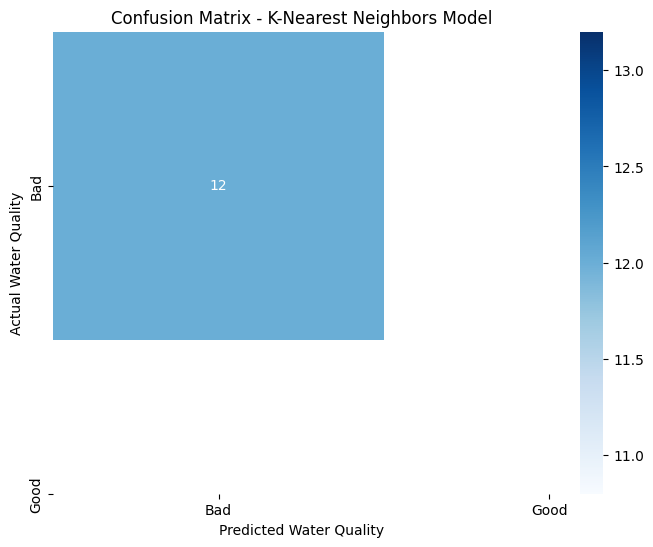

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.title('Confusion Matrix - K-Nearest Neighbors Model')
plt.xlabel('Predicted Water Quality')
plt.ylabel('Actual Water Quality')
plt.show()


# **pie chart to visualize the distribution of main elements across all seasons in the DataFrame.**

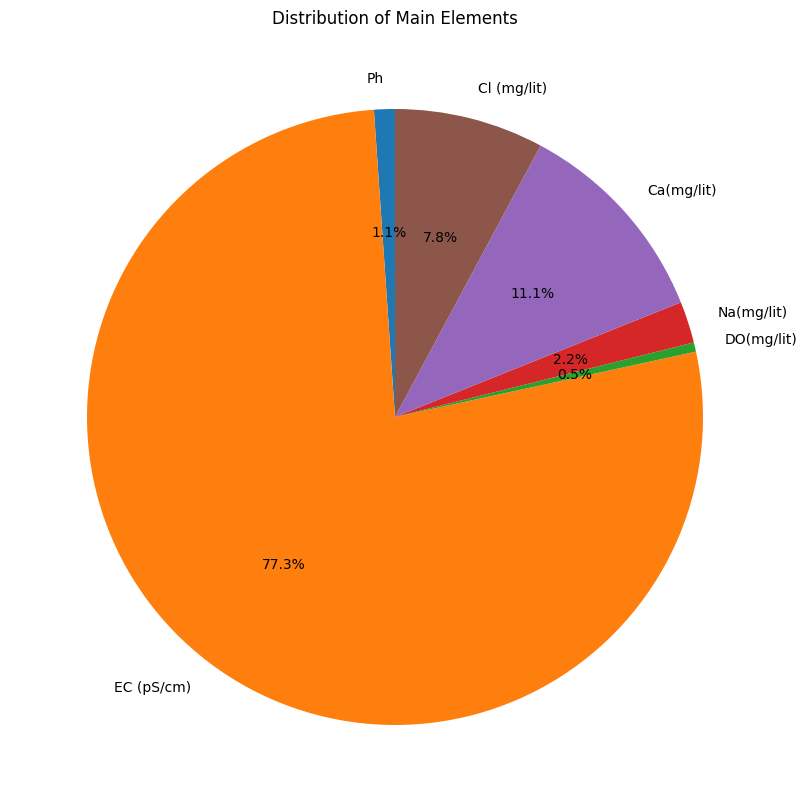

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Choose the main elements to include in the pie chart
main_elements = ['Ph', 'EC (pS/cm)', 'DO(mg/lit)', 'Na(mg/lit)', 'Ca(mg/lit)', 'Cl (mg/lit)']

# Filter the DataFrame for only the main elements
df_main_elements = df[main_elements]

# Drop rows containing NaN values
df_main_elements = df_main_elements.dropna()

# Plot a single pie chart for the distribution of main elements across all seasons
plt.figure(figsize=(10, 10))
main_elements_data = df_main_elements.mean()
main_elements_data.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Main Elements')
plt.show()


# **A box plot to visualize the distribution of the 'DO(mg/lit)' (Dissolved Oxygen) element across different seasons in the DataFrame.**

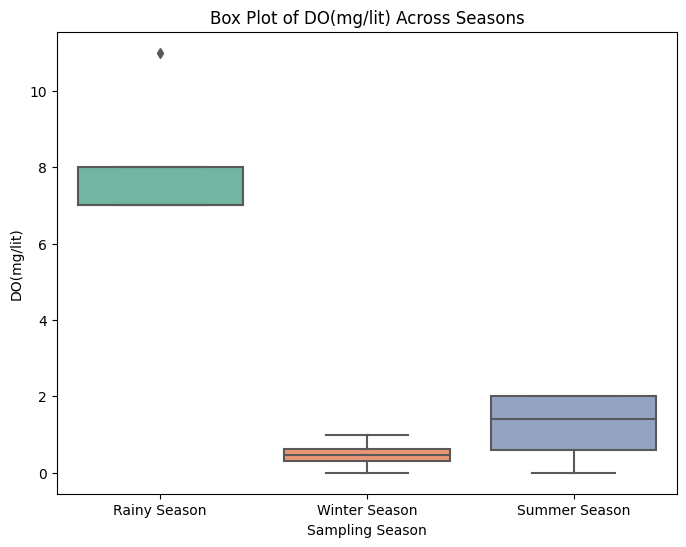

In [ ]:
# Box plot for a single element
element_to_plot = 'DO(mg/lit)'

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sampling Season'], y=df[element_to_plot], palette='Set2')
plt.title(f'Box Plot of {element_to_plot} Across Seasons')
plt.show()


# **A scatter plot to visualize the relationship between two selected elements, 'Ph' and 'Turbidity,'**

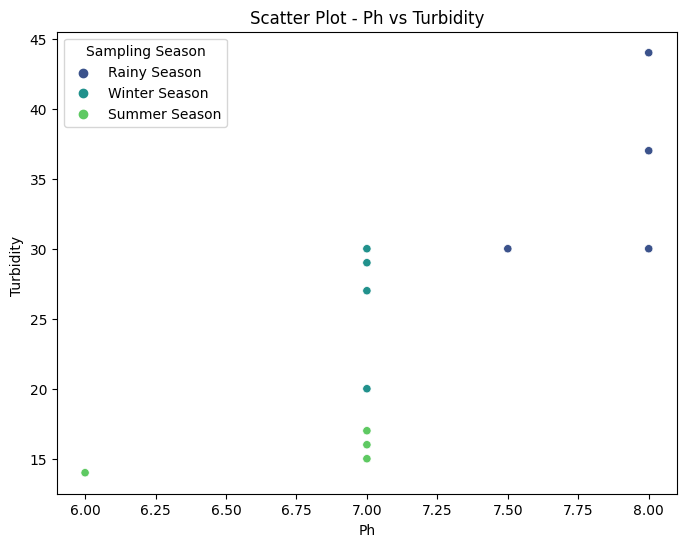

In [ ]:
# Plot scatter plot for two selected elements
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Ph', y='Turbidity ', hue='Sampling Season', palette='viridis')
plt.title('Scatter Plot - Ph vs Turbidity')
plt.show()

# **A scatter plot to visualize the relationship between two selected elements, 'Ph' and 'EC (pS/cm)**

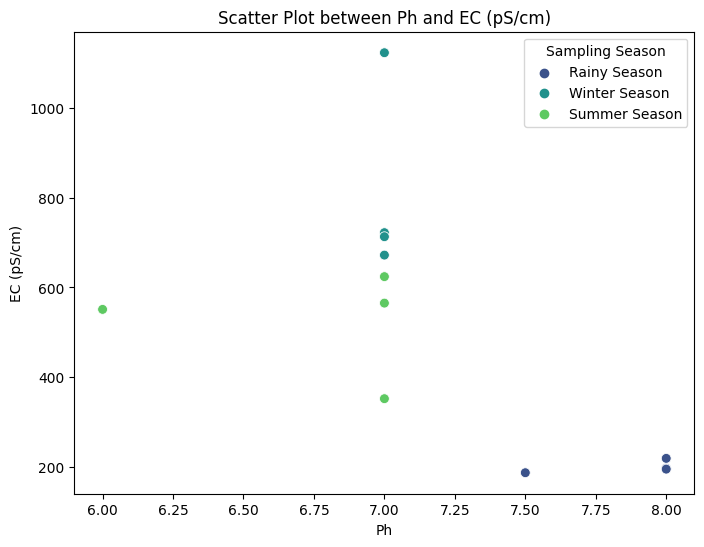

In [ ]:
# Scatter plot for two elements
element1 = 'Ph'
element2 = 'EC (pS/cm)'

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=element1, y=element2, hue='Sampling Season', palette='viridis', s=50)
plt.title(f'Scatter Plot between {element1} and {element2}')
plt.show()


# **Histograms for selected elements**


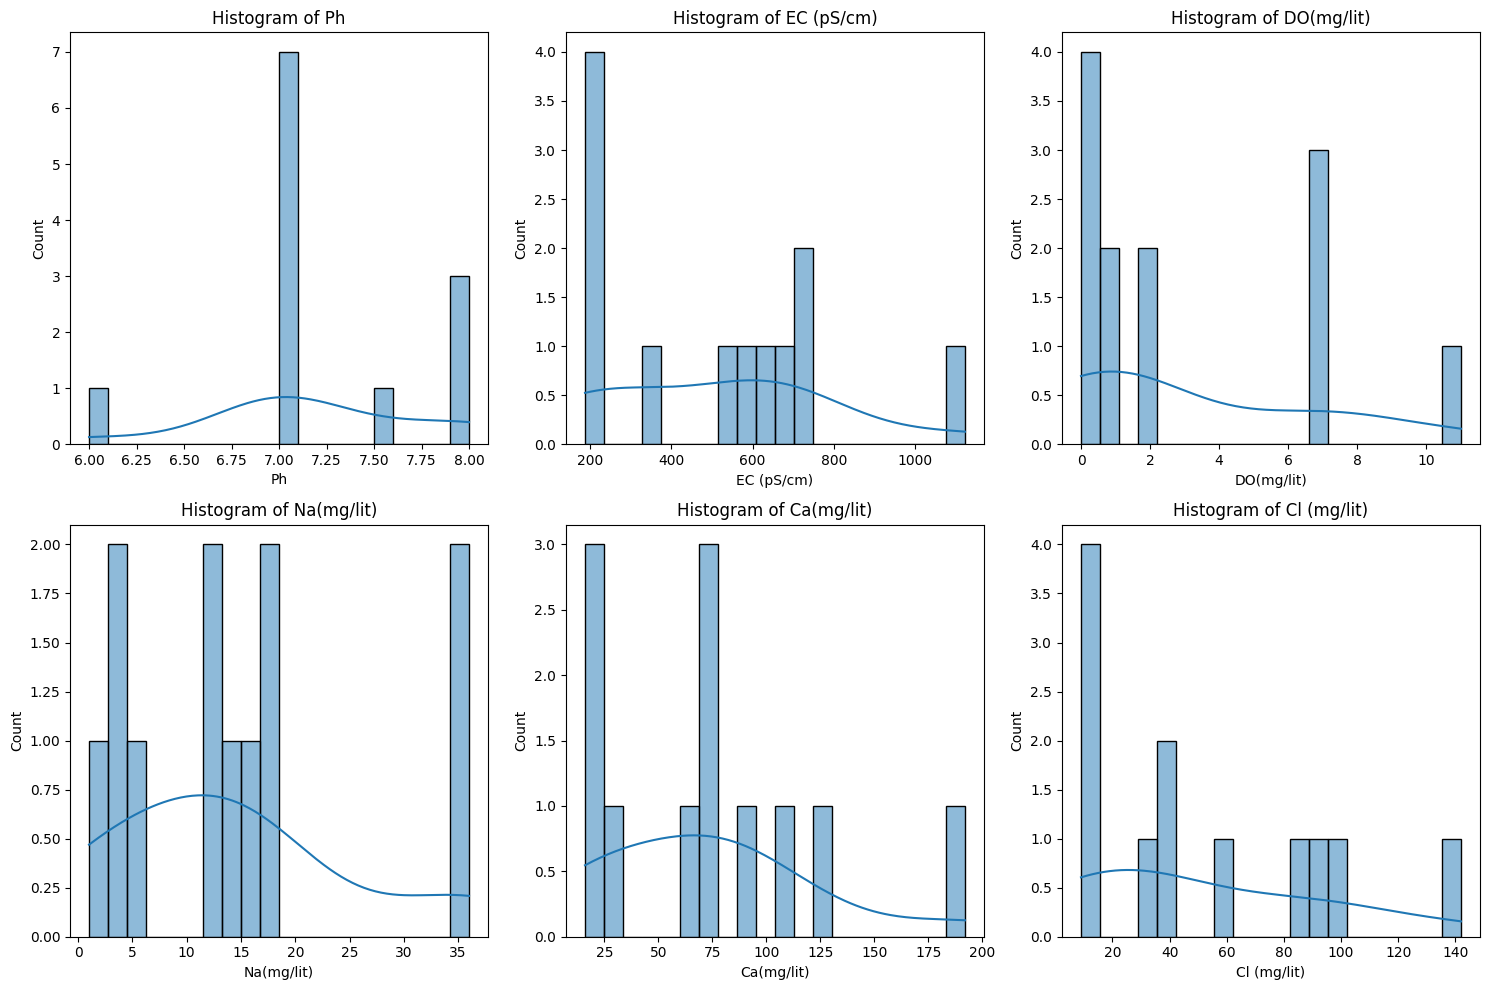

In [ ]:
# Histograms for selected elements
selected_elements = ['Ph', 'EC (pS/cm)', 'DO(mg/lit)', 'Na(mg/lit)', 'Ca(mg/lit)', 'Cl (mg/lit)']

plt.figure(figsize=(15, 10))
for i, element in enumerate(selected_elements, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[element], bins=20, kde=True)
    plt.title(f'Histogram of {element}')

plt.tight_layout()
plt.show()


# **Pie chart for overall element distribution**

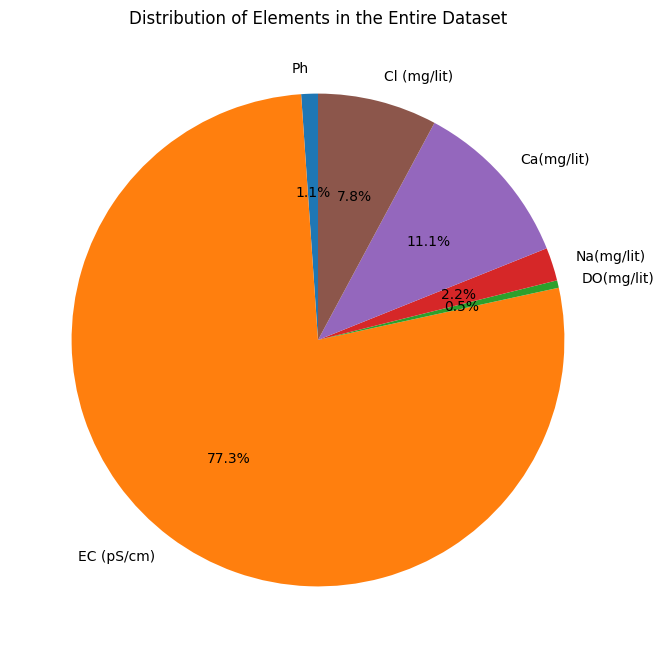

In [ ]:
# Pie chart for overall element distribution
plt.figure(figsize=(8, 8))
element_distribution = df[selected_elements].mean()
element_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Elements in the Entire Dataset')
plt.show()
